# BrainStation Capstone Project

## Author: Jason Lew

### Date: 03/06/2024

#### Description: Using machine learning model to predict the outcomes of NHL games
#### Target Variable - Binary target variable that indicates whether the home team wins(1) or loses(0)
#### Model - Logistic Regresssion; good for predicting one of two outcome(win or lose)

In [10]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load Dataset
df = pd.read_csv('hockey_data.csv')
pd.set_option('display.max_columns', None)
df

,team,season,name,gameId,playerTeam,opposingTeam,home_or_away,gameDate,position,situation,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
0,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,other,0.0000,0.0000,0.0000,42.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.689,0.019,0.069,0.164,0.020,0.521,0.207,0.019,0.019,0.019,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.019,0.000,0.000,0.0,0.0,0.0,1.000,1.0,1.000,0.0,0.017,0.000,0.000,0.037,0.037,0.037,0
1,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,all,0.4596,0.6408,0.6310,3600.0,37.733,2.287,2.842,8.155,1.134,22.530,16.054,2.249,2.396,2.357,41.0,12.0,13.0,66.0,2.0,1.0,0.0,14.0,2.0,18.0,16.0,39.0,51.0,4.0,8.0,30.0,16.0,19.0,8.0,44.0,8.0,1.0,1.040,0.811,0.435,1.0,0.0,1.0,68.292,53.0,54.697,4.0,0.641,0.014,0.029,2.899,3.030,2.980,22.880,2.689,1.780,4.436,0.639,12.626,8.830,2.524,2.607,2.450,21.0,10.0,6.0,37.0,1.0,1.0,0.0,5.0,1.0,8.0,15.0,20.0,30.0,7.0,14.0,32.0,17.0,11.0,7.0,16.0,12.0,3.0,0.599,1.278,0.811,1.0,0.0,0.0,36.140,31.0,30.369,5.0,0.396,0.168,0.168,2.917,2.833,2.714,0
2,NYR,2008,NYR,2008020001,NYR,T.B,AWAY,20081004,Team Level,5on5,0.4857,0.6429,0.6364,2283.0,24.802,1.693,1.724,5.513,0.739,14.650,10.681,1.656,1.803,1.764,28.0,7.0,10.0,45.0,1.0,0.0,0.0,10.0,1.0,14.0,9.0,27.0,34.0,3.0,6.0,19.0,13.0,13.0,7.0,27.0,8.0,0.0,0.882,0.811,0.000,1.0,0.0,0.0,47.292,35.0,36.697,4.0,0.355,0.000,0.000,2.048,2.180,2.130,14.729,1.793,1.117,3.001,0.406,7.737,5.946,1.633,1.711,1.559,11.0,9.0,5.0,25.0,1.0,1.0,0.0,4.0,1.0,4.0,9.0,10.0,19.0,7.0,14.0,18.0,13.0,9.0,5.0,12.0,6.0,2.0,0.498,0.689,0.606,1.0,0.0,0.0,24.140,20.0,19.

In [4]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199820 entries, 0 to 199819
Columns: 111 entries, team to playoffGame
dtypes: float64(100), int64(4), object(7)
memory usage: 169.2+ MB


In [5]:
# Check for missing values
df.isnull().sum()

team                                         0
season                                       0
name                                         0
gameId                                       0
playerTeam                                   0
                                            ..
reboundxGoalsAgainst                         0
totalShotCreditAgainst                       0
scoreAdjustedTotalShotCreditAgainst          0
scoreFlurryAdjustedTotalShotCreditAgainst    0
playoffGame                                  0
Length: 111, dtype: int64

In [6]:
# Summary statistics
df.describe()

,season,gameId,gameDate,xGoalsPercentage,corsiPercentage,fenwickPercentage,iceTime,xOnGoalFor,xGoalsFor,xReboundsFor,xFreezeFor,xPlayStoppedFor,xPlayContinuedInZoneFor,xPlayContinuedOutsideZoneFor,flurryAdjustedxGoalsFor,scoreVenueAdjustedxGoalsFor,flurryScoreVenueAdjustedxGoalsFor,shotsOnGoalFor,missedShotsFor,blockedShotAttemptsFor,shotAttemptsFor,goalsFor,reboundsFor,reboundGoalsFor,freezeFor,playStoppedFor,playContinuedInZoneFor,playContinuedOutsideZoneFor,savedShotsOnGoalFor,savedUnblockedShotAttemptsFor,penaltiesFor,penalityMinutesFor,faceOffsWonFor,hitsFor,takeawaysFor,giveawaysFor,lowDangerShotsFor,mediumDangerShotsFor,highDangerShotsFor,lowDangerxGoalsFor,mediumDangerxGoalsFor,highDangerxGoalsFor,lowDangerGoalsFor,mediumDangerGoalsFor,highDangerGoalsFor,scoreAdjustedShotsAttemptsFor,unblockedShotAttemptsFor,scoreAdjustedUnblockedShotAttemptsFor,dZoneGiveawaysFor,xGoalsFromxReboundsOfShotsFor,xGoalsFromActualReboundsOfShotsFor,reboundxGoalsFor,totalShotCreditFor,scoreAdjustedTotalShotCreditFor,scoreFlurryAdjustedTotalShotCreditFor,xOnGoalAgainst,xGoalsAgainst,xReboundsAgainst,xFreezeAgainst,xPlayStoppedAgainst,xPlayContinuedInZoneAgainst,xPlayContinuedOutsideZoneAgainst,flurryAdjustedxGoalsAgainst,scoreVenueAdjustedxGoalsAgainst,flurryScoreVenueAdjustedxGoalsAgainst,shotsOnGoalAgainst,missedShotsAgainst,blockedShotAttemptsAgainst,shotAttemptsAgainst,goalsAgainst,reboundsAgainst,reboundGoalsAgainst,freezeAgainst,playStoppedAgainst,playContinuedInZoneAgainst,playContinuedOutsideZoneAgainst,savedShotsOnGoalAgainst,savedUnblockedShotAttemptsAgainst,penaltiesAgainst,penalityMinutesAgainst,faceOffsWonAgainst,hitsAgainst,takeawaysAgainst,giveawaysAgainst,lowDangerShotsAgainst,mediumDangerShotsAgainst,highDangerShotsAgainst,lowDangerxGoalsAgainst,mediumDangerxGoalsAgainst,highDangerxGoalsAgainst,lowDangerGoalsAgainst,mediumDangerGoalsAgainst,highDangerGoalsAgainst,scoreAdjustedShotsAttemptsAgainst,unblockedShotAttemptsAgainst,scoreAdjustedUnblockedShotAttemptsAgainst,dZoneGiveawaysAgainst,xGoalsFromxReboundsOfShotsAgainst,xGoalsFromActualReboundsOfShotsAgainst,reboundxGoalsAgainst,totalShotCreditAgainst,scoreAdjustedTotalShotCreditAgainst,scoreFlurryAdjustedTotalShotCreditAgainst,playoffGame
count,199820.000000,1.998200e+05,1.998200e+05,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000,199820.000000
mean,2015.409769,2.015431e+09,2.016068e+07,0.483625,0.486768,0.483625,1463.009428,12.160524,1.130468,0.834646,2.774043,0.397929,6.765351,5.033608,1.086245,1.133495,1.089198,12.234601,4.738605,5.730117,22.703323,1.136563,0.901131,0.186638,2.744820,0.400370,5.439796,6.350836,11.098038,15.836643,1.583475,3.6257

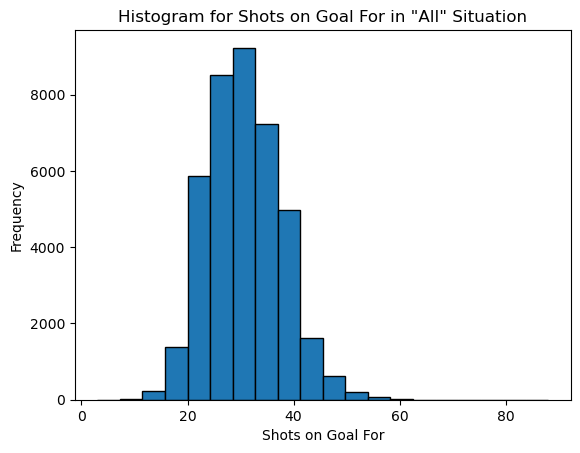

In [13]:
# Distribution of shots on goal for
filtered_data = df[df['situation'] == 'all']
plt.hist(filtered_data['shotsOnGoalFor'], bins=20, edgecolor='black')
plt.title('Histogram for Shots on Goal For in "All" Situation')
plt.xlabel('Shots on Goal For')
plt.ylabel('Frequency')
plt.show()

In [20]:
filtered_data = df[df['situation'] == 'all']
total_shots = filtered_data['shotsOnGoalFor'].sum()
total_games = filtered_data['gameId'].nunique()
average_shots_per_game = total_shots / total_games
print(f'Average Shots per Game: {average_shots_per_game}')

Average Shots per Game: 61.17300570513462


In [23]:
filtered_data = df[df['situation'] == 'all']
average_shots_per_game_per_team = filtered_data.groupby('team')['shotsOnGoalFor'].mean()
print(average_shots_per_game_per_team)

team
ANA    29.306687
ARI    28.890575
ATL    29.662602
BOS    32.465753
BUF    29.963415
CAR    32.059414
CBJ    30.131955
CGY    30.719146
CHI    31.366790
COL    30.741167
DAL    30.272239
DET    30.507692
EDM    29.848221
FLA    32.000000
L.A    30.303985
LAK    33.716102
MIN    29.181464
MTL    30.243755
N.J    28.679884
NJD    32.361702
NSH    30.358819
NYI    30.136012
NYR    30.317812
OTT    30.640823
PHI    30.830391
PIT    32.511611
S.J    32.240143
SEA    29.556962
SJS    28.418919
STL    29.818182
T.B    29.912234
TBL    30.960784
TOR    31.194030
VAN    29.897377
VGK    33.036484
WPG    30.594089
WSH    30.475277
Name: shotsOnGoalFor, dtype: float64


In [24]:
filtered_data = df[df['situation'] == 'all']
average_shots_on_goal_for = filtered_data['shotsOnGoalFor'].mean()
print(average_shots_on_goal_for)

30.58650285256731


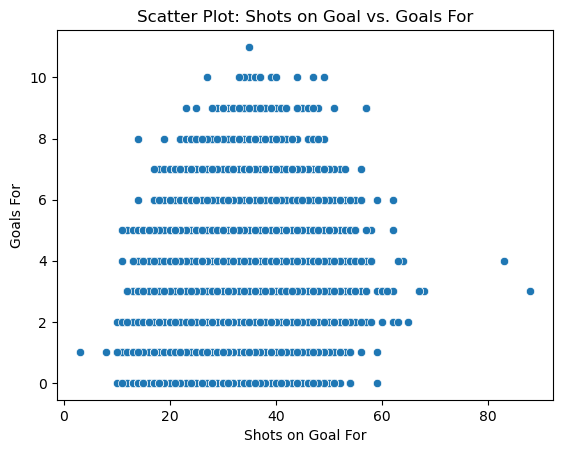

In [16]:
# Correlation between shots on goals for and goals for
filtered_data = df[df['situation'] == 'all']
sns.scatterplot(x='shotsOnGoalFor', y='goalsFor', data=filtered_data)
plt.title('Scatter Plot: Shots on Goal vs. Goals For')
plt.xlabel('Shots on Goal For')
plt.ylabel('Goals For')
plt.show()

In [18]:
correlation_coefficient = df['shotsOnGoalFor'].corr(df['goalsFor'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Correlation Coefficient: 0.7069771957378722


year
1970    227108.0
Name: goalsFor, dtype: float64